# Tankmodell - Vi tømmer tanken
__Creative Commons BY-SA : bitjungle (Rune Mathisen) og fuzzbin (Tom Jarle Christiansen)__

Vi har en tank med samme tverrsnitt $A_t=2 \ \mathrm{m}^2$ over hele høyden til tanken. I bunnen av tanken er det et hull hvor innholdet i tanken renner ut. Arealet til dette hullet er $A_h=0,01 \ \mathrm{m}^2$. Ved tiden $t=0 \ \mathrm{s}$ er tanken fylt opp til høyden $h=4 \ \mathrm{m}$. Hvordan vil høyden $h$ endres over tid? Når er tanken tom? Vi antar at væsken er inkompresibel og at den strømmer friksjonsfritt ut av hullet i bunnen. Vi kan også sette $g=9.81 \ \mathrm{m/s}^2$.

![Skisse av tanken](img/tank01.png)

La oss først definere de parametrene vi har fått oppgitt:

In [1]:
import math # vi trenger dette biblioteket senere

A_t = 2.00 # Tankens areal
A_h = 0.01 # Hullets areal
h = 4.00 # Vannivået i forsøket starter
g = 9.81 # Gravitasjonskonstanten

Volumet av væsken i tanken (før det renner ut) kan skrives som:

$$ V = A_t \cdot h $$

Vi kan nå regne ut volumet $V_{0}$ av væsken i tanken ved tiden $t=0 \ \mathrm{s}$ på følgende måte i python:

In [2]:
V0 = A_t * h
print("Volumet ved tiden t = 0 s er {} m^3".format(V0))

Volumet ved tiden t = 0 s er 8.0 m^3


Vi setter så opp et uttrykk for hvordan volumet endrer seg over tid, når det bare strømmer væske ut av tanken og det ikke kommer noe væske inn i tanken. Da har vi at:

$$ \frac{dV}{dt} = -q_{ut}$$

Eller for å si det med ord: 
> Endringen til volumet av væsken i tanken er lik mengden væske som strømmer ut av tanken i det samme tidsrommet.

Mengden $q_{ut}$ som strømmer ut av tanken er gitt ved arealet $A_h$ til hullet og hastigheten $v_1$ på væskestrømmen ut av hullet: 

$$ q_{ut} = A_h \cdot v_1 $$

Siden tverrsnittet $A_t$ til tanken er konstant og volumet av væsken i tanken er gitt ved $V=A_t \cdot h$, kan vi nå skrive:

$$ A_t \frac{dh_0}{dt} = -A_h \cdot v_1 $$


Fra fysikken kjenner vi [Bernoulli's ligning](http://hyperphysics.phy-astr.gsu.edu/hbase/pber.html) som kan brukes til å beskrive hvordan vannet vil renne ut av tanken.

$$ P_0 + \rho g h + \frac{1}{2}\rho v_0^2= P_1 + \rho g h_1 + \frac{1}{2}\rho v_1^2$$

Der $P$ er trykk og $\rho$ er massetettheten til væsken. Venstre og høyre side av ligningen tilsvarer to ulike steder i systemet. Vi lar venstre side av ligningen være et punkt i vannflaten på toppen av tanken, og høyre side er et punkt rett ved utløpet i bunnen.

Vi har da at $P_0 = P_1 = P_{atm}$. Siden trykket $P$ er likt på begge sider av ligningen, kanselerer disse hverandre. Farten til vannet på toppen av tanken er så liten at vi med god rimelighet kan si at $v_0\approx0 \ \mathrm{m/s}$. Vi definerer at høyden er null ved tankens bunn, og vi får $h_1=0\ \mathrm{m}$.

Vi kan nå løse ligningen med hensyn på $v_1$, og får:

$$ v_1 = \sqrt{2gh} $$

Vi setter $\sqrt{2g} = k $, og får:
$$ v_1 = k \sqrt{h} $$

In [3]:
k = math.sqrt(2*g)
print("Konstanten k er {}".format(k))

Konstanten k er 4.4294469180700204


Nå kan vi sette inn uttrykket for $v$ i uttrykket for endring av volumet til væsken i tanken:

$$ A_t \frac{dh}{dt} = -A_h k \sqrt{h}$$

Uttrykket for endring av høyden over tid blir da:

$$ \frac{dh}{dt} = - \frac{A_h}{A_t} k \sqrt{h}  $$

Vi bruker Eulers metode for å finne ut hva høyden $h$ er ved tiden $i+1$:

$$ \frac{h_{i+1} − h_i}{t_{i+1} − t_i} = − \frac{A_h}{A_t}  k\sqrt{h_i} $$

$$ h_{i+1} = − \frac{A_h}{A_t}  k\sqrt{h_i} \cdot (t_{i+1} − t_i) + h_i $$

Nå kan vi implementere Eulers metode i Python:

In [4]:
def euler(h, t, t_neste):
    '''Regner ut ny høyde i tanken vet tiden t_neste, gitt høyden ved tiden t. 
       Bruker globale variabler for areal av tank og hull i bunn av tanken.
    '''
    return -(A_h/A_t) * k * math.sqrt(h) * (t_neste - t) + h

Vi starter ved tiden $t=0$ og endrer tiden med 5 sekunder for hver nye beregning ($\Delta t=5$).

t = 0 => h = 4.0 	 v = 8.86 	 qut = 0.0886
t = 5 => h = 3.78 	 v = 8.61 	 qut = 0.0861
t = 10 => h = 3.56 	 v = 8.36 	 qut = 0.0836
t = 15 => h = 3.35 	 v = 8.11 	 qut = 0.0811
t = 20 => h = 3.15 	 v = 7.86 	 qut = 0.0786
t = 25 => h = 2.95 	 v = 7.61 	 qut = 0.0761
t = 30 => h = 2.76 	 v = 7.36 	 qut = 0.0736
t = 35 => h = 2.58 	 v = 7.12 	 qut = 0.0712
t = 40 => h = 2.4 	 v = 6.87 	 qut = 0.0687
t = 45 => h = 2.23 	 v = 6.62 	 qut = 0.0662
t = 50 => h = 2.07 	 v = 6.37 	 qut = 0.0637
t = 55 => h = 1.91 	 v = 6.12 	 qut = 0.0612
t = 60 => h = 1.75 	 v = 5.87 	 qut = 0.0587
t = 65 => h = 1.61 	 v = 5.61 	 qut = 0.0561
t = 70 => h = 1.47 	 v = 5.36 	 qut = 0.0536
t = 75 => h = 1.33 	 v = 5.11 	 qut = 0.0511
t = 80 => h = 1.2 	 v = 4.86 	 qut = 0.0486
t = 85 => h = 1.08 	 v = 4.61 	 qut = 0.0461
t = 90 => h = 0.97 	 v = 4.36 	 qut = 0.0436
t = 95 => h = 0.86 	 v = 4.1 	 qut = 0.041
t = 100 => h = 0.76 	 v = 3.85 	 qut = 0.0385
t = 105 => h = 0.66 	 v = 3.6 	 qut = 0.036
t = 110 => h = 0.

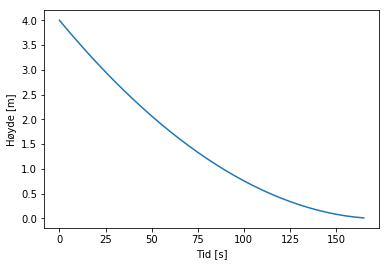

In [5]:
t = 0  # starttiden
dt = 5 # tidssteg i sekunder
h_lim = 0.01 # vi stopper beregningen når høyden er mindre enn denne
t_hist = [] # Lagerplass for historiske tidspunkter
h_hist = [] # Lagerplass for historiske h-verdier
while h > h_lim:
    t_neste = t + dt
    if t > 0: # ingen beregning ved t = 0, der bruker vi initialverdier
        h = euler(h, t, t_neste)
    v = k * math.sqrt(h) # Hastigheten til væsken som strømmer ut av hullet
    q_ut = A_h * v # Mengden væske som strømmer ut av hullet
    print("t = {} => h = {} \t v = {} \t qut = {}".format(t, round(h,2), round(v,2), round(q_ut,4)))
    t_hist.append(t)
    h_hist.append(h)
    t = t_neste

import matplotlib.pyplot as plt
plt.plot(t_hist, h_hist)
plt.ylabel('Høyde [m]')
plt.xlabel('Tid [s]')
plt.show()